In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

from imblearn.over_sampling import SMOTE

In [2]:
# load data from correct file path 
path = r"C:\Users\lawso\OneDrive\Documents\GitHub\DS-3001\labs\data.csv" 
data_df = pd.read_csv(path)

# call data frame to check for accuracy
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# droping an empty column 
data_df = data_df.drop(['Unnamed: 32'], axis = 1)

data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# saving a non encoded for graphing with the target
non_encode = data_df

# one hot encoding diagnosis 
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data_df[['diagnosis']]).toarray()
one_hot_df = pd.DataFrame(encoded, columns= encoder.get_feature_names_out(['diagnosis']))
data_df = pd.concat([data_df, one_hot_df.set_axis(data_df.index)], axis=1)

drop_cols = ['diagnosis']
data_df = data_df.drop(drop_cols, axis = 1)
data_df.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,1.0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,1.0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,1.0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0,1.0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,1.0


In [5]:
# normalizing columns to have a mean of 0 and st. dev of 1
for col in data_df.columns[1:]:
    scaler = StandardScaler()
    data_df[col] = scaler.fit_transform(data_df[[col]])

data_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676,1.297676
1,842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676,1.297676
2,84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676,1.297676
3,84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676,1.297676
4,84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676,1.297676


In [6]:
# scaling all columns to have a range of [0, 1]

for col in data_df.columns[1:]:
    scaler = MinMaxScaler()
    data_df[col] = scaler.fit_transform(data_df[[col]])

data_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0,1.0
1,842517,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0,1.0
2,84300903,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0,1.0
3,84348301,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0,1.0
4,84358402,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0,1.0


In [7]:
# we will be making three data frames: one with mean, one with worst values, and one with standard error (se)
drop_column1 = ['id', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','radius_mean', 'perimeter_mean', 'area_mean', 'fractal_dimension_mean']
no_mean_df = data_df.drop(drop_column1, axis = 1)

# creating the df for the worst values 
drop_column2 = ["radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se"]
worst_df = no_mean_df.drop(drop_column2, axis = 1)
worst_df.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0,1.0
1,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0,1.0
2,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0,1.0
3,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0,1.0
4,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0,1.0


In [8]:
# creating the df for the standard error values 
drop_columns3 = [ "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
se_df = no_mean_df.drop(drop_columns3, axis = 1) 
se_df.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis_B,diagnosis_M
0,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.0,1.0
1,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.0,1.0
2,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.0,1.0
3,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.0,1.0
4,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.0,1.0


In [9]:
# creating the df for the mean values 
mean_df = data_df.drop(drop_column2, axis = 1)
mean_df = mean_df.drop(drop_columns3, axis = 1)

# having to drop id column separately since it is not in the other lists 
mean_df = mean_df.drop('id', axis = 1)
mean_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_B,diagnosis_M
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.0,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.0,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.0,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.0,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

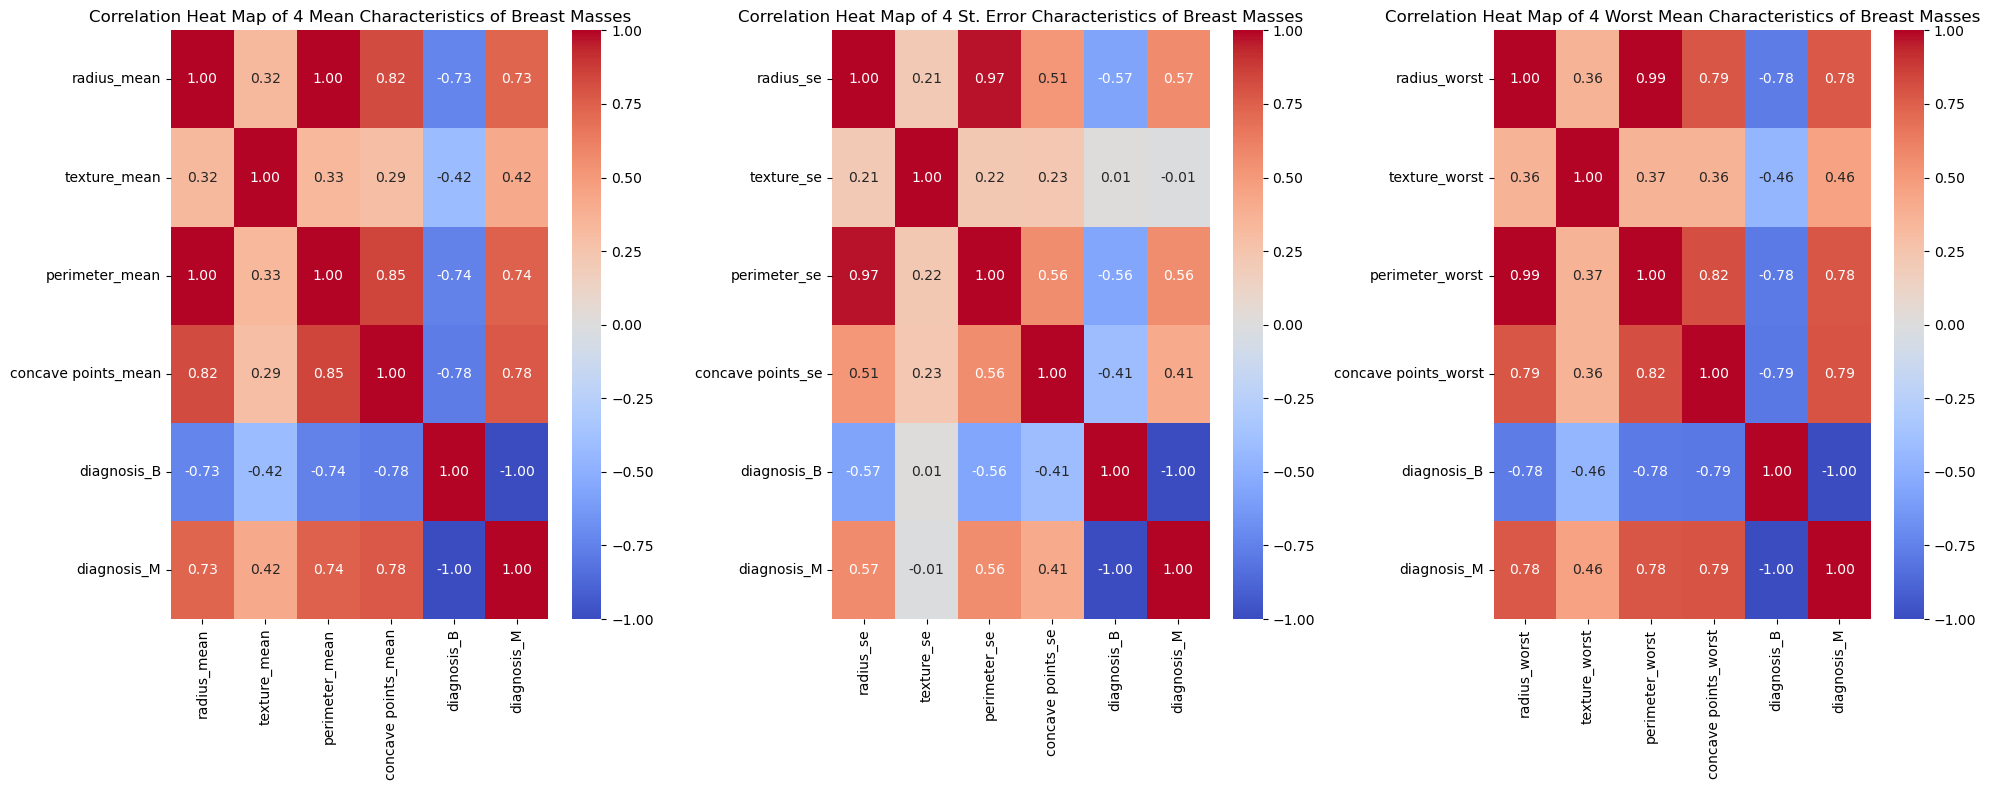

In [12]:
# creating a correlation matrix for three characteristics to show the difference based on measurement
corr_df1 = mean_df[['radius_mean', 'texture_mean', 'perimeter_mean', 'concave points_mean', 'diagnosis_B', 'diagnosis_M']]
corr_df2 = se_df[['radius_se', 'texture_se', 'perimeter_se', 'concave points_se', 'diagnosis_B', 'diagnosis_M']]
corr_df3 = worst_df[['radius_worst', 'texture_worst', 'perimeter_worst', 'concave points_worst', 'diagnosis_B', 'diagnosis_M']]

corr_matrix1 = corr_df1.corr()
corr_matrix2 = corr_df2.corr()
corr_matrix3 = corr_df3.corr()

# creating a 3 by 1 plot to graph each correlation matrix on 
fig, axes = plt.subplots(1, 3, figsize = (20, 8))
sns.heatmap(corr_matrix1, annot = True, cmap = 'coolwarm', fmt = '.2f', ax = axes[0])
axes[0].set_title('Correlation Heat Map of 4 Mean Characteristics of Breast Masses')
sns.heatmap(corr_matrix2, annot = True, cmap = 'coolwarm', fmt = '.2f', ax = axes[1])
axes[1].set_title('Correlation Heat Map of 4 St. Error Characteristics of Breast Masses')
sns.heatmap(corr_matrix3, annot = True, cmap = 'coolwarm', fmt = '.2f', ax = axes[2])
axes[2].set_title('Correlation Heat Map of 4 Worst Mean Characteristics of Breast Masses')
plt.tight_layout()
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

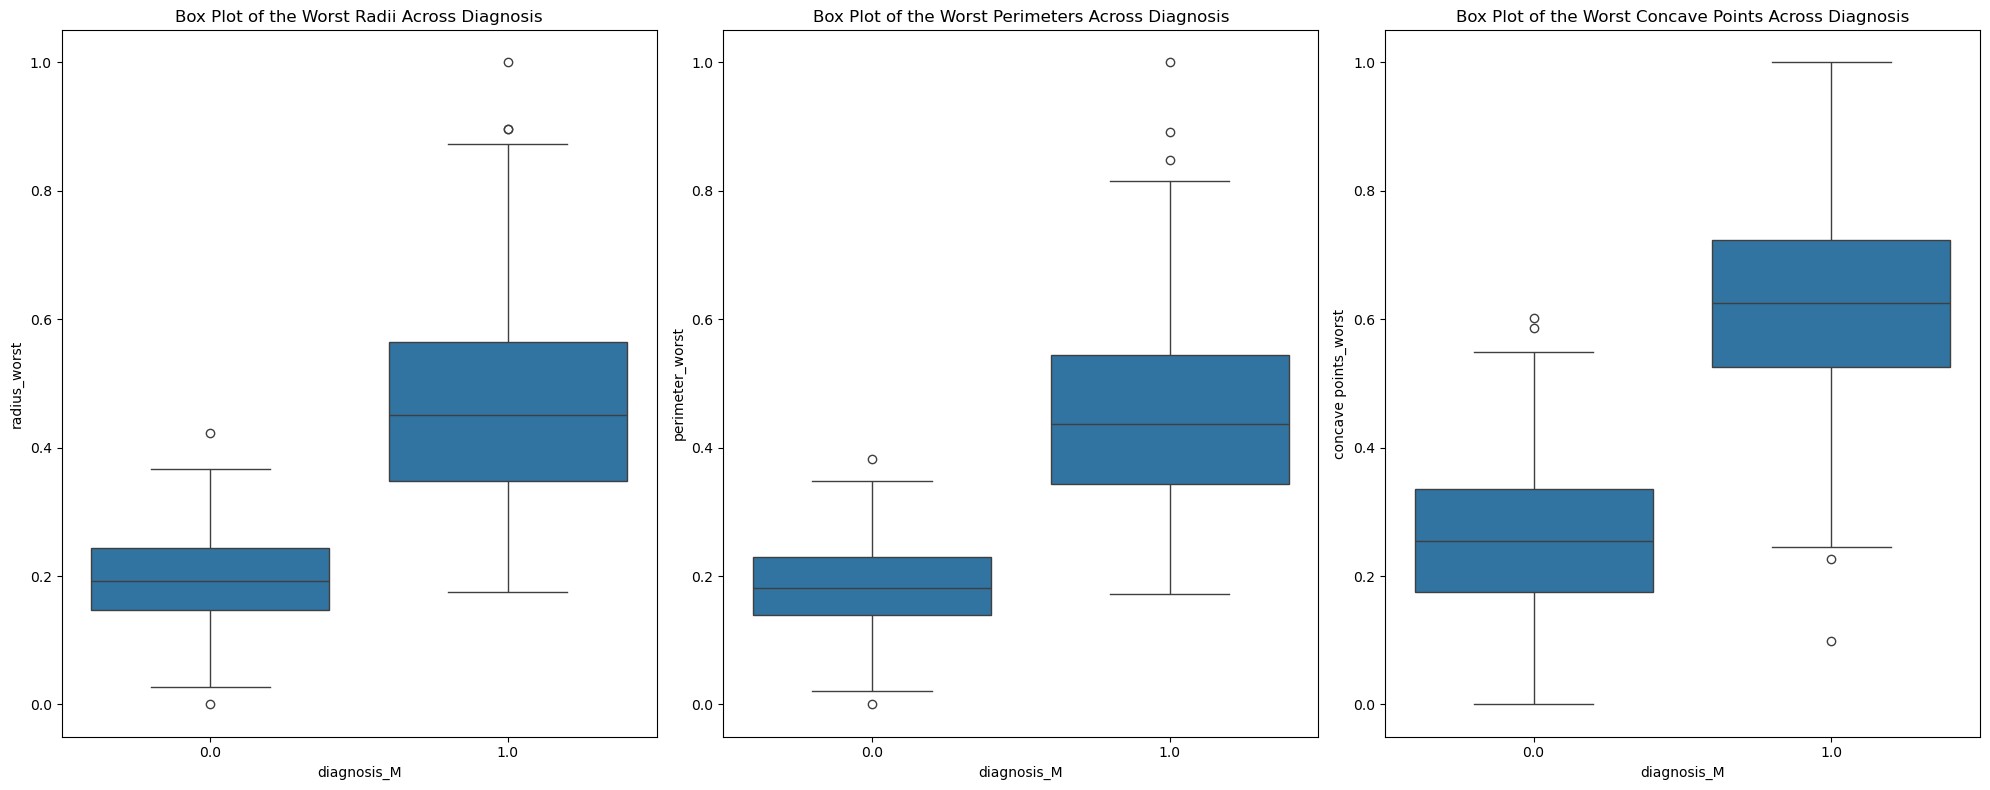

In [ ]:
# plotting box plots of the three "worst" parameters with the highest correlation to diagnosis 
col_list = ['radius_worst', 'perimeter_worst', 'concave points_worst']

fig, axes = plt.subplots(1, 3, figsize = (20, 8))
sns.boxplot(x='diagnosis_M', y=col_list[0], data= worst_df, ax = axes[0])
axes[0].set_title('Box Plot of the Worst Radii Across Diagnosis')
sns.boxplot(x='diagnosis_M', y=col_list[1], data= worst_df, ax = axes[1])
axes[1].set_title('Box Plot of the Worst Perimeters Across Diagnosis')
sns.boxplot(x='diagnosis_M', y=col_list[2], data= worst_df, ax = axes[2])
axes[2].set_title('Box Plot of the Worst Concave Points Across Diagnosis')
plt.tight_layout()
plt.show 